In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import esmlab

import warnings
warnings.filterwarnings("ignore")

### Reading in Data

In [2]:
dir = '/glade/p/cesm/lmwg_dev/dll/CMIP6_CO2/CatCO2data/'
#note: 'CNRM-ESM2-1' uses r1k1p1f2 -- does this mean it's different in some way?

BCC_CSM2 = xr.open_dataset(dir + "co2_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
BCC_ESM1 = xr.open_dataset(dir + "co2_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc")
CNRM     = xr.open_dataset(dir + "co2_Amon_CNRM-ESM2-1_historical_r1i1p1f2_gr_185001-201412.nc")
GFDL     = xr.open_dataset(dir + "co2_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-201412.nc")
MRI      = xr.open_dataset(dir + "co2_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc")
NorESM   = xr.open_dataset(dir + "co2_Amon_NorESM2-MM_historical_r1i1p1f1_gn_185001-201412.nc")
CESM     = xr.open_dataset(dir + "co2_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc")


### Updating coordinates so math functions work properly

In [3]:
#coordinates are already properly set for CNRM
BCC_CSM2 = BCC_CSM2.set_coords(['time_bnds', 'lat_bnds', 'lon_bnds'])
BCC_ESM1 = BCC_ESM1.set_coords(['time_bnds', 'lat_bnds', 'lon_bnds'])
#CNRM     = CNRM.set_coords(['time_bnds', 'lat_bnds', 'lon_bnds'])
GFDL     = GFDL.set_coords(['time_bnds', 'lat_bnds', 'lon_bnds'])
MRI      = MRI.set_coords(['time_bnds', 'lat_bnds', 'lon_bnds'])
NorESM   = NorESM.set_coords(['time_bnds', 'lat_bnds', 'lon_bnds'])
CESM     = CESM.set_coords(['time_bnds', 'lat_bnds', 'lon_bnds'])

In [ ]:
#CESM

### Setting up dictionary for easier manipulation

In [4]:
co2_ds = dict()
co2_ds['BCC_CSM2']  = BCC_CSM2.co2
co2_ds['BCC_ESM1']  = BCC_ESM1.co2
co2_ds['CNRM']      = CNRM.co2
co2_ds['GFDL']      = GFDL.co2
co2_ds['MRI']       = MRI.co2
co2_ds['NorESM']    = NorESM.co2
co2_ds['CESM']      = CESM.co2

In [ ]:
co2_ds

In [5]:
#conversion of CO2 from mol/mol to ppm
convert = 10.0**6 * 28.966/44.0

### Setting up arrays to subset points

In [6]:
#Locations: Mauna Loa, Barrow, Niwot
lats=np.array([71.3,19.5,40.1])
lons=np.array([360-156.61,360-155.6,360-105.6])

### Testing model and location subsets to determine maximum CO2 concentrations 

#### Why do most models have nans at Niwot at lowest level? There are similar problems with other locations & levels
#### Why are values ~100 ppm lower than observations? 

In [7]:
#Locations: Mauna Loa=0, Barrow=1, Niwot=2
x=1
test = []
test = co2_ds['CESM'].sel(lat=lats[x],lon=lons[x], method='nearest')
#test = co2_ds['CESM'].sel(lat=slice(30,90))
test = test.isel(time=slice(-60, None), plev=0)*convert
test.max()

## Max val at NWT is 289.86, lowest level with available data is plev=3
## Max val at MLO is 291.16 (plev=0)
## Max val at BRW is 288.55 (plev=1)

<xarray.DataArray 'co2' ()>
array(nan)
Coordinates:
    lat      float64 19.32
    lon      float64 205.0
    plev     float64 1e+05
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    comment:        vinth2p((CO2*28.966/44.0),hyam, hybm, plev, PS, P0)
    description:    Mole fraction is used in the construction mole_fraction_o...
    frequency:      mon
    id:             co2
    long_name:      Mole Fraction of CO2
    mipTable:       Amon
    out_name:       co2
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  mole_fraction_of_carbon_dioxide_in_air
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Mole Fraction of CO2
    type:           real
    units:          mol mol-1
    variable_id:    co2

In [8]:
#Locations: Mauna Loa=0, Barrow=1, Niwot=2
x=0
test = []
test = co2_ds['CESM'].sel(lat=lats[x],lon=lons[x], method='nearest')
#test = co2_ds['CESM'].sel(lat=slice(30,90))
test = test.isel(time=slice(-60, None), plev=0)*convert
test.max()

<xarray.DataArray 'co2' ()>
array(291.16107178)
Coordinates:
    lat      float64 71.15
    lon      float64 203.8
    plev     float64 1e+05
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    comment:        vinth2p((CO2*28.966/44.0),hyam, hybm, plev, PS, P0)
    description:    Mole fraction is used in the construction mole_fraction_o...
    frequency:      mon
    id:             co2
    long_name:      Mole Fraction of CO2
    mipTable:       Amon
    out_name:       co2
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  mole_fraction_of_carbon_dioxide_in_air
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Mole Fraction of CO2
    type:           real
    units:          mol mol-1
    variable_id:    co2

NOTE: May want to consider remaking Graven plot
change in CO2 amplitude vs CO2 amplitude over certain time period. 

NOTE: Values for CESM aren't consistent with other analysis. Incorrect calculations? 
other possible differences: processed for diff. atmosphere layers


### Pulling out site locations

In [9]:
ml_nbp = {}
bar_nbp = {}
nwt_nbp = {}

ml_nbp_mean = {}
ml_nbp_std = {}
bar_nbp_mean = {}
bar_nbp_std = {}
nwt_nbp_mean = {}
nwt_nbp_std = {}

for sim_name, data in co2_ds.items():
    ml = data.sel(lat=19.5,lon=204.4, method='nearest')
    ml_nbp[sim_name] = ml.isel(plev=0) * convert
    bar = data.sel(lat=71.3,lon=203.4, method='nearest')
    bar_nbp[sim_name] = bar.isel(plev=0) * convert
    nwt = data.sel(lat=40.1,lon=254.4, method='nearest')
    nwt_nbp[sim_name] = nwt.isel(plev=0) * convert

### Calculating amplitude time series and 2000-2015 mean and error for each location

In [10]:
# Mauna Loa
for sim_name, data in ml_nbp.items():
    co2amp = data.resample(time="Y").max() - data.resample(time="Y").min()
    ml_nbp[sim_name] = co2amp
    co2_mean_amp = co2amp.isel(time=slice(-60, None)).mean()
    ml_nbp_mean[sim_name] = co2_mean_amp
    co2_std_amp = co2amp.isel(time=slice(-60, None)).std()
    ml_nbp_std[sim_name] = co2_std_amp

In [11]:
# Barrow
for sim_name, data in bar_nbp.items():
    co2amp = data.resample(time="Y").max() - data.resample(time="Y").min()
    bar_nbp[sim_name] = co2amp
    co2_mean_amp = co2amp.isel(time=slice(-60, None)).mean()
    bar_nbp_mean[sim_name] = co2_mean_amp
    co2_std_amp = co2amp.isel(time=slice(-60, None)).std()
    bar_nbp_std[sim_name] = co2_std_amp

In [12]:
# Niwot Ridge
for sim_name, data in nwt_nbp.items():
    co2amp = data.resample(time="Y").max() - data.resample(time="Y").min()
    nwt_nbp[sim_name] = co2amp
    co2_mean_amp = co2amp.isel(time=slice(-60, None)).mean()
    nwt_nbp_mean[sim_name] = co2_mean_amp
    co2_std_amp = co2amp.isel(time=slice(-60, None)).std()
    nwt_nbp_std[sim_name] = co2_std_amp

In [14]:
#ml_nbp['CESM'].isel(time=slice(-60, None))
#nwt_nbp_mean['CESM']

### Plotting mean amplitude averaged for 2000-2015
Only plots values for Barrow, other locations are nans for most (not all) models. Some models low/nans for Barrow
CESM mean amplitude here seems lower than in my other plots (should be ~15 ppm)

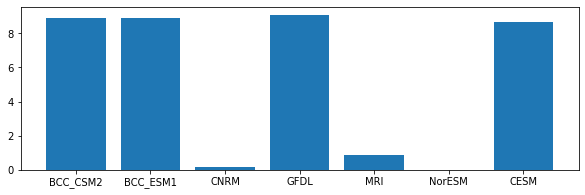

In [15]:
#Barrow
plt.figure(figsize=(10,3))
plt.bar(*zip(*bar_nbp_mean.items()))
plt.show()

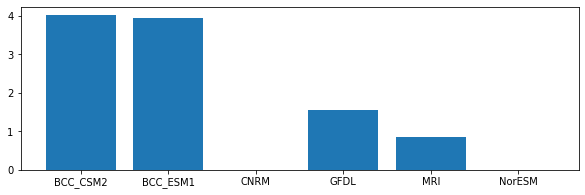

In [16]:
#Mauna Loa
plt.figure(figsize=(10,3))
plt.bar(*zip(*ml_nbp_mean.items()))
plt.show()

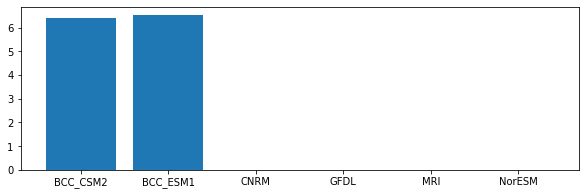

In [17]:
#Niwot
plt.figure(figsize=(10,3))
plt.bar(*zip(*nwt_nbp_mean.items()))
plt.show()

In [ ]:
#This needs to be cleaned up
fig = plt.figure(figsize=(10,3))
for i,(site, data) in enumerate (nwt_nbp.items()):
    ax = fig.add_subplot(2,4,i+1)
    data.plot(color='darkorange', label='CESM1')
#    plt.title(labels[i])
    plt.ylabel(r'CO$_2$ amplitude [ppm]')
    plt.xlabel('Year')
    plt.ylim(0,12)
    plt.tight_layout()
#    plt.text(0.05, 0.93,panel[i], fontsize=14,
#     ha='center', va='center', transform=plt.gca().transAxes)

In [ ]:
for sim_name, data in co2_ds.items():
    co2amp  = data.resample(time="Y").max() - data.resample(time="Y").min()
#    co2amp  = co2amp * convert
    co2_ds[sim_name] = co2amp

In [ ]:
co2_ds